# Correlation

In [39]:
cd Downloads/

[WinError 2] The system cannot find the file specified: 'Downloads/'
C:\Users\Saikat\Downloads


In [40]:
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [42]:
df = pd.read_csv('Advertising.csv')

In [43]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [44]:
X = df[["TV"]]
Y=df[["Sales"]]

In [45]:
reg_model = LinearRegression().fit(X,Y)
c = reg_model.intercept_[0]
M=reg_model.coef_[0][0]

In [46]:
print("Linear Regression parameters at : c = {0}, M={1}".format(c,M))

Linear Regression parameters at : c = 7.032593549127693, M=0.047536640433019764


In [47]:
#y = mx +c
M*150 + c

14.163089614080658

In [48]:
newData = [150]
newData = pd.DataFrame(newData,columns=["TV"])

In [49]:
newData

,TV
0,150


In [50]:
reg_model.predict(newData)


array([[14.16308961]])

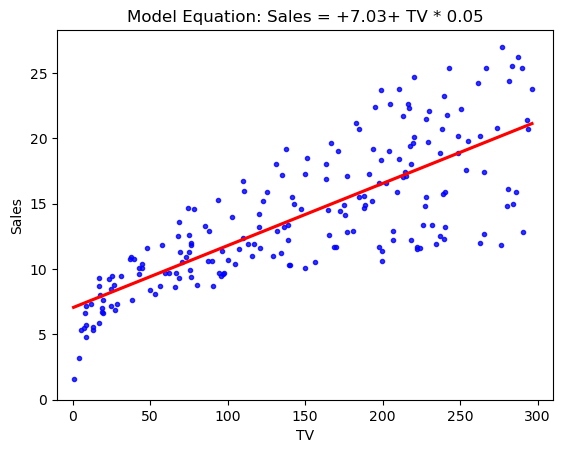

In [51]:
g = sns.regplot(x =X ,y=Y,scatter_kws={'color':'b','s':9},
               ci=False,color='r')
g.set_title(f"Model Equation: Sales = +{round(reg_model.intercept_[0],2)}+ TV * {round(reg_model.coef_[0][0],2)}")
g.set_ylabel("Sales")
g.set_xlabel("TV")
plt.xlim(-10,310)
plt.ylim(bottom = 0)
plt.show()

In [52]:
df = pd.read_csv("Mens_height_weight.csv")

In [53]:
df.head()

,Height,Weight
0,179,84
1,177,83
2,164,62
3,181,90
4,186,91


In [54]:
indipendentVar = df[["Height"]]
dependentVar = df[["Weight"]]

In [55]:
reg_model = LinearRegression().fit(indipendentVar,dependentVar)
c = reg_model.intercept_[0]
M=reg_model.coef_[0][0]

In [58]:
print("Linear Regression parameters at : c = {0}, M={1}".format(c,M))

Linear Regression parameters at : c = -99.2772096062735, M=1.000921418068943


In [59]:
M*180 + c

80.88864564613623

In [60]:
newData = [180,182]
newData = pd.DataFrame(newData,columns=["Weight"])

In [61]:
reg_model.predict(newData)

array([[80.88864565],
       [82.89048848]])

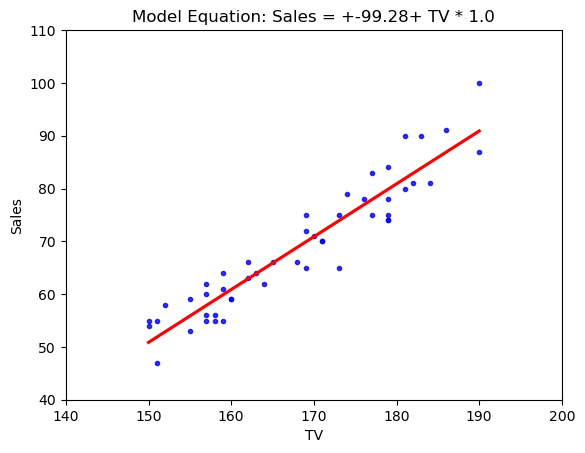

In [62]:
g = sns.regplot(x =indipendentVar ,y=dependentVar,scatter_kws={'color':'b','s':9},
               ci=False,color='r')
g.set_title(f"Model Equation: Sales = +{round(reg_model.intercept_[0],2)}+ TV * {round(reg_model.coef_[0][0],2)}")
g.set_ylabel("Sales")
g.set_xlabel("TV")
plt.xlim(140,200)
plt.ylim(40,110)
plt.show()

In [ ]:
#Generate Correlation Matrix
df.corr()

In [ ]:
df.Weight.shape

In [ ]:
df.Height[:,np.newaxis]

In [ ]:
df.columns

In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X = df.Height[:,np.newaxis],y=df.Weight)
print("Intercept is "+str(lm.intercept_))
print("Coefficient value of the Height is "+str(lm.coef_))



In [ ]:
flg,ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(x=df.Height,y=df.Weight)

ax.plot(df.Height,lm.predict(X=df.Height[:,np.newaxis]),color = 'red')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')

plt.show()

In [ ]:
basketballdf = pd.read_csv('basketball.csv')

In [ ]:
basketballdf.head()

In [ ]:
basketballdf.describe()

In [ ]:
df_corr = basketballdf.corr()

In [ ]:
df_corr

In [ ]:
flg,ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(x=basketballdf.height,y=basketballdf.avg_points_scored)

plt.show()

In [ ]:
flg,ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(x=basketballdf.weight,y=basketballdf.avg_points_scored)

plt.show()

In [ ]:
flg,ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(x=basketballdf.success_field_goals,y=basketballdf.avg_points_scored)

plt.show()

In [ ]:
flg,ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(x=basketballdf.success_free_throws,y=basketballdf.avg_points_scored)
ax.set_xlabel("Success Free Throws")
ax.set_ylabel("Average Point Scored")
plt.show()

In [ ]:
X_columns = basketballdf.columns[:-1]
print(X_columns)
for i in X_columns:
    flg,ax = plt.subplots(nrows=1,ncols=1)
    ax.scatter(x=basketballdf[i],y=basketballdf.avg_points_scored)
    ax.set_xlabel(i)
    ax.set_ylabel("Average Point Scored")
    plt.show()
    

In [ ]:
from sklearn import model_selection,feature_selection,preprocessing
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error


In [ ]:
X = basketballdf.values.copy()
X_train,X_valid,y_train,y_valid = model_selection.train_test_split(X[:,:-1],X[:,-1],train_size=0.80)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
result = sm.OLS(endog=y_train,exog=add_constant(data=X_train)).fit()
result.summary()